## Naives Bayes

Using weather data to predict thermal categories

In [ ]:
# Load libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# 1. Load dataset

PATH = "/Users/moritzknodler/Documents/00_Lectures/0_Fall 2025/ML/z_Project/Flight data/thermals/thermals_weather_PCA_clusters.csv"
 
df = pd.read_csv(PATH)

print("Original rows:", len(df))
print("Original columns:", len(df.columns))

weather_cols = [
    "temperature_2m",
    "dewpoint_2m",
    "windspeed_10m",
    "winddirection_10m",
    "cloudcover_low",
    "cloudcover_mid",
    "cloudcover_high",
    "shortwave_radiation",
    "boundary_layer_height"
]

# Target label
label_col = ["cluster"]

# Final selection (choose with or without PCA)
df = df[weather_cols + label_col].copy()

print("Filtered columns:", df.columns.tolist())
print("Filtered rows:", len(df))

display(df.head())

print("Rows:", len(df))
display(df.sample(5))

Original rows: 7868
Original columns: 37
Filtered columns: ['temperature_2m', 'dewpoint_2m', 'windspeed_10m', 'winddirection_10m', 'cloudcover_low', 'cloudcover_mid', 'cloudcover_high', 'shortwave_radiation', 'boundary_layer_height', 'cluster']
Filtered rows: 7868


,temperature_2m,dewpoint_2m,windspeed_10m,winddirection_10m,cloudcover_low,cloudcover_mid,cloudcover_high,shortwave_radiation,boundary_layer_height,cluster
0,1.8,-9.1,3.7,349.0,0.0,0.0,0.0,545.0,355.0,3
1,0.9,-10.0,3.7,349.0,0.0,0.0,0.0,545.0,355.0,5
2,2.0,-8.9,3.7,349.0,0.0,0.0,0.0,545.0,255.0,5
3,2.6,-11.0,3.3,6.0,0.0,0.0,0.0,522.0,250.0,5
4,2.6,-11.0,3.3,6.0,0.0,0.0,0.0,522.0,250.0,5


Rows: 7868


,temperature_2m,dewpoint_2m,windspeed_10m,winddirection_10m,cloudcover_low,cloudcover_mid,cloudcover_high,shortwave_radiation,boundary_layer_height,cluster
2845,20.5,7.6,2.5,352.0,4.0,2.0,0.0,805.0,1305.0,1
3536,12.6,0.4,4.5,284.0,1.0,0.0,48.0,517.0,1375.0,5
3465,15.1,9.8,4.8,312.0,87.0,84.0,20.0,691.0,1730.0,3
4135,15.4,2.2,8.6,68.0,0.0,68.0,35.0,792.0,1920.0,1
3982,14.8,2.9,3.4,72.0,0.0,32.0,98.0,562.0,2445.0,1


In [ ]:
# 2. Ensure no missing values

# Display number of missing values per column
print("\nMissing values per column:")
print(df[weather_cols + ["cluster"]].isnull().sum())    

df = df.dropna(subset=weather_cols + ["cluster"])

X = df[weather_cols]
y = df["cluster"].astype(int)  # clusters 1–5

print("Weather feature matrix shape:", X.shape)


Missing values per column:
temperature_2m           0
dewpoint_2m              0
windspeed_10m            0
winddirection_10m        0
cloudcover_low           0
cloudcover_mid           0
cloudcover_high          0
shortwave_radiation      0
boundary_layer_height    0
cluster                  0
dtype: int64
Weather feature matrix shape: (7868, 9)


In [14]:
# 3. Train/test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

display(X_train.head())
display(y_train.head())

display(X_test.head())
display(y_test.head())


# --- Show split summary ---
print("\n📊 Train/Test Split Summary")
print(f"Train rows: {len(X_train):,} ({100*len(X_train)/len(df):.1f}%)")
print(f"Test rows : {len(X_test):,}  ({100*len(X_test)/len(df):.1f}%)")

# Cluster distribution in original dataset
print("\n📌 Cluster distribution (original full dataset):")
print(y.value_counts(normalize=True).mul(100).round(1).sort_index(), "\n")

# Cluster distribution in train set
print("📌 Cluster distribution (train set):")
print(y_train.value_counts(normalize=True).mul(100).round(1).sort_index(), "\n")

# Cluster distribution in test set
print("📌 Cluster distribution (test set):")
print(y_test.value_counts(normalize=True).mul(100).round(1).sort_index())

,temperature_2m,dewpoint_2m,windspeed_10m,winddirection_10m,cloudcover_low,cloudcover_mid,cloudcover_high,shortwave_radiation,boundary_layer_height
7577,24.5,12.2,3.8,343.0,0.0,7.0,1.0,786.0,1490.0
162,10.9,-3.6,5.5,23.0,0.0,0.0,0.0,730.0,1425.0
7661,22.0,10.5,5.7,18.0,4.0,33.0,0.0,737.0,1005.0
2499,17.7,8.3,4.8,103.0,0.0,0.0,0.0,750.0,1900.0
6083,10.1,-2.4,3.0,256.0,0.0,0.0,26.0,851.0,0.0


7577    5
162     3
7661    3
2499    3
6083    2
Name: cluster, dtype: int64

,temperature_2m,dewpoint_2m,windspeed_10m,winddirection_10m,cloudcover_low,cloudcover_mid,cloudcover_high,shortwave_radiation,boundary_layer_height
2592,19.4,4.1,5.4,233.0,4.0,0.0,0.0,732.0,2210.0
4939,6.1,-2.6,4.3,275.0,1.0,0.0,0.0,948.0,1565.0
5192,15.0,4.5,6.7,306.0,6.0,70.0,96.0,760.0,1655.0
4414,16.4,4.5,7.0,339.0,0.0,18.0,0.0,818.0,1885.0
1289,18.8,10.9,4.0,270.0,0.0,36.0,0.0,526.0,1010.0


2592    1
4939    3
5192    1
4414    3
1289    4
Name: cluster, dtype: int64


📊 Train/Test Split Summary
Train rows: 5,901 (75.0%)
Test rows : 1,967  (25.0%)

📌 Cluster distribution (original full dataset):
cluster
1    28.3
2    10.2
3    19.3
4     9.3
5    32.9
Name: proportion, dtype: float64 

📌 Cluster distribution (train set):
cluster
1    28.3
2    10.2
3    19.3
4     9.3
5    32.9
Name: proportion, dtype: float64 

📌 Cluster distribution (test set):
cluster
1    28.3
2    10.2
3    19.3
4     9.4
5    32.9
Name: proportion, dtype: float64


In [ ]:
# 4. Scale features (important for Gaussian NB)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scaling Summary
print("\nScaling Summary")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape : {X_test_scaled.shape}")

# Compute mean/std over ALL TRAIN DATA
train_mean_all = X_train_scaled.mean(axis=0).round(3)
train_std_all  = X_train_scaled.std(axis=0).round(3)

print("\nMean of ALL scaled train features (should be ~0):")
print(pd.Series(train_mean_all, index=weather_cols))

print("\nStd deviation of ALL scaled train features (should be ~1):")
print(pd.Series(train_std_all, index=weather_cols))

# Show first 5 rows visually
print("\nFirst 5 rows of scaled training data:")
display(pd.DataFrame(X_train_scaled[:5], columns=weather_cols))


📐 Scaling Summary
X_train_scaled shape: (5901, 9)
X_test_scaled shape : (1967, 9)

📊 Mean of ALL scaled train features (should be ~0):
temperature_2m           0.0
dewpoint_2m             -0.0
windspeed_10m            0.0
winddirection_10m        0.0
cloudcover_low          -0.0
cloudcover_mid           0.0
cloudcover_high         -0.0
shortwave_radiation     -0.0
boundary_layer_height    0.0
dtype: float64

📉 Std deviation of ALL scaled train features (should be ~1):
temperature_2m           1.0
dewpoint_2m              1.0
windspeed_10m            1.0
winddirection_10m        1.0
cloudcover_low           1.0
cloudcover_mid           1.0
cloudcover_high          1.0
shortwave_radiation      1.0
boundary_layer_height    1.0
dtype: float64

🔎 First 5 rows of scaled training data:


,temperature_2m,dewpoint_2m,windspeed_10m,winddirection_10m,cloudcover_low,cloudcover_mid,cloudcover_high,shortwave_radiation,boundary_layer_height
0,1.356405,1.254205,-0.842560,1.368359,-0.473939,-0.567339,-0.628727,0.538235,0.102719
1,-1.018164,-1.561025,-0.131272,-1.306727,-0.473939,-0.874037,-0.657970,0.112963,0.005423
2,0.919904,0.951300,-0.047591,-1.348525,-0.293322,0.571824,-0.657970,0.166122,-0.623258
3,0.169121,0.559306,-0.424155,-0.637955,-0.473939,-0.874037,-0.657970,0.264846,0.716432
4,-1.157844,-1.347210,-1.177284,0.641070,-0.473939,-0.874037,0.102342,1.031855,-2.127604


In [ ]:
# 5. Run Gaussian Naive Bayes

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

y_pred = nb.predict(X_test_scaled)


In [ ]:
# 6.1 Evaluation
print("\n🔍 Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\n Classification Report:")
print(classification_report(y_test, y_pred))


🔍 Accuracy: 0.391

 Classification Report:
              precision    recall  f1-score   support

           1       0.35      0.62      0.45       557
           2       0.17      0.04      0.06       200
           3       0.00      0.00      0.00       379
           4       0.00      0.00      0.00       184
           5       0.44      0.65      0.53       647

    accuracy                           0.39      1967
   macro avg       0.19      0.26      0.21      1967
weighted avg       0.26      0.39      0.31      1967



/Users/moritzknodler/.pyenvs/global/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/moritzknodler/.pyenvs/global/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/moritzknodler/.pyenvs/global/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri

In [ ]:
# 7. Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=[1,2,3,4,5],
    yticklabels=[1,2,3,4,5]
)
plt.title("Naive Bayes – Confusion Matrix (Accuracy: {:.2f}%)".format(100*accuracy_score(y_test, y_pred)))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

/Users/moritzknodler/.pyenvs/global/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/moritzknodler/.pyenvs/global/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/moritzknodler/.pyenvs/global/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri

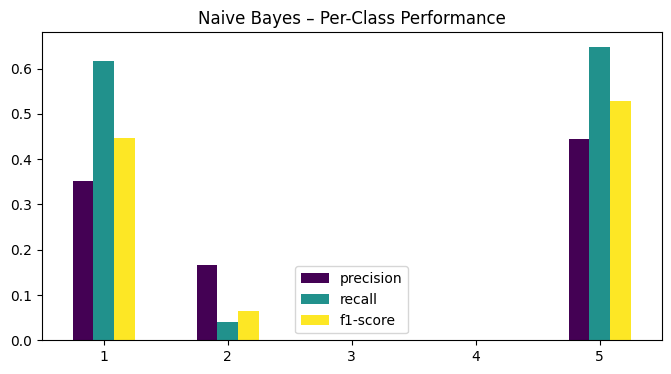

In [ ]:
# 7.2 Evaluation

report = classification_report(y_test, y_pred, output_dict=True)
df_rep = pd.DataFrame(report).transpose()

df_rep.iloc[:-3][["precision","recall","f1-score"]].plot(
    kind="bar", figsize=(8,4), rot=0, colormap="viridis"
)
plt.title("Naive Bayes – Per-Class Performance")
plt.show()

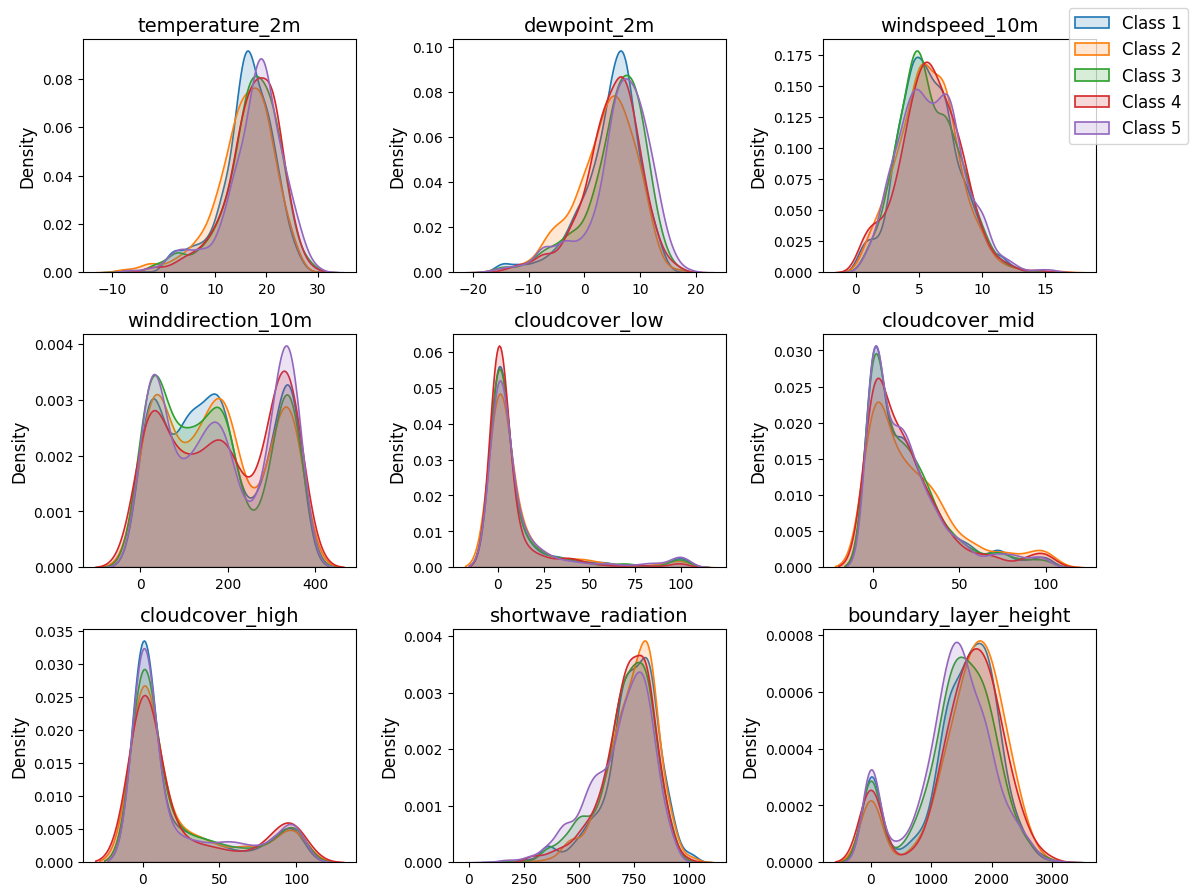

In [ ]:
# 7. Visualize feature distributions per class



# Get feature list
cols = X.columns[:9]
classes = sorted(df["cluster"].unique())

fig, axes = plt.subplots(3, 3, figsize=(12, 9))  
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    
    for c in classes:
        sns.kdeplot(
            X_train[y_train == c][col],
            fill=True,
            alpha=0.18,
            linewidth=1.2,
            ax=ax,
            label=f"Class {c}" if i == 0 else None
        )

    ax.set_title(col, fontsize=14)
    ax.tick_params(axis='both', labelsize=10)
    ax.set_ylabel("Density", fontsize=12)
    ax.set_xlabel("")

# Hide any unused subplot spaces
for j in range(len(cols), len(axes)):
    axes[j].axis("off")

# Global legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", fontsize=12)

plt.tight_layout(rect=[0, 0, 0.93, 1])
plt.show()